In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# load/clean

https://data.gov.uk/dataset/statistics_on_obesity_physical_activity_and_diet_england/datapackage.zip

In [2]:
data=pd.read_excel('../data/obes-phys-acti-diet-eng-2016-tab.xlsx')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [4]:
data=pd.read_excel('../data/obes-phys-acti-diet-eng-2016-tab.xlsx',sheet='Table 6')
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [6]:
data=pd.read_excel('../data/obes-phys-acti-diet-eng-2016-tab.xlsx',sheetname='Table 6',
                   skiprows=3,skip_footer=14)
#pd.read_excel?
data.head()

,Year,Unnamed: 1,All ages,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over,Unknown
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014/15,NaN,440288.0,3357.0,28321.0,71483.0,56598.0,73281.0,80400.0,79101.0,47732.0,15.0
2,2013/14,NaN,365577.0,3011.0,23743.0,59059.0,47629.0,61823.0,68175.0,63735.0,38393.0,9.0
3,2012/13,NaN,292404.0,3115.0,18849.0,43681.0,39627.0,51364.0,55676.0,50262.0,29822.0,8.0
4,2011/12,NaN,266666.0,2824.0,16016.0,37060.0,37098.0,47514.0,53209.0,45949.0,26989.0,7.0


In [12]:
del data['Unnamed: 1']

In [13]:
data.dropna(inplace=True)

In [14]:
data.set_index('Year',inplace=True)

In [9]:
data.head()

,Unnamed: 0,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2014/15,440288,3357,28321,71483,56598,73281,80400,79101,47732,15
1,2013/14,365577,3011,23743,59059,47629,61823,68175,63735,38393,9
2,2012/13,292404,3115,18849,43681,39627,51364,55676,50262,29822,8
3,2011/12,266666,2824,16016,37060,37098,47514,53209,45949,26989,7
4,2010/11,211783,2762,12042,26965,30606,39258,43754,36056,20056,284


# visualize

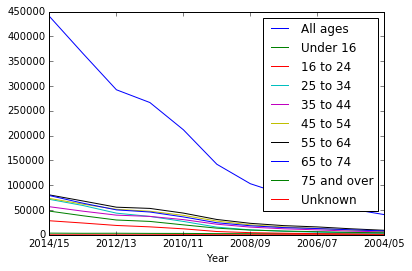

In [30]:
data.plot()

In [31]:
data_without_all=data.drop('All ages',axis=1)

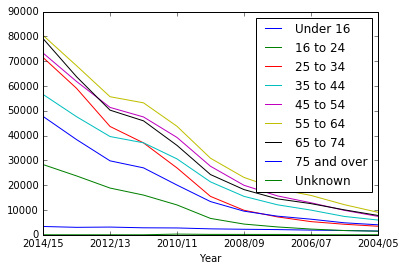

In [33]:
data_without_all.plot()

In [8]:
data=pd.read_excel('../data/obes-phys-acti-diet-eng-2016-tab.xlsx',sheetname='Table 6',
                   skiprows=3,skip_footer=14)
del data['Unnamed: 1']
data.dropna(inplace=True)
data['Year']=data['Year'].str[:4]
data['Year']=data['Year'].apply(pd.to_datetime,format='%Y-%m')
data.set_index('Year',inplace=True)
data.sort_index(ascending=True,inplace=True)
data_without_all=data.drop('All ages',axis=1)

In [9]:
data.head()

,All ages,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over,Unknown
Year,,,,,,,,,,
2004-01-01,40741.0,1506.0,1457.0,3449.0,5953.0,7424.0,9086.0,7813.0,4036.0,17.0
2005-01-01,52019.0,1727.0,1717.0,4252.0,7401.0,9858.0,12146.0,10056.0,4840.0,22.0
2006-01-01,67211.0,1896.0,2316.0,5319.0,9961.0,12922.0,15882.0,12571.0,6296.0,48.0
2007-01-01,80914.0,2104.0,3169.0,7218.0,12101.0,15683.0,18489.0,14496.0,7512.0,142.0
2008-01-01,102987.0,2229.0,4326.0,9899.0,15508.0,19971.0,23136.0,18234.0,9531.0,153.0


In [20]:
data_without_all.index=data_without_all.index.strftime("%Y-%m")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2004-01 to 2014-01
Data columns (total 10 columns):
All ages       11 non-null float64
Under 16       11 non-null float64
16 to 24       11 non-null float64
25 to 34       11 non-null float64
35 to 44       11 non-null float64
45 to 54       11 non-null float64
55 to 64       11 non-null float64
65 to 74       11 non-null float64
75 and over    11 non-null float64
Unknown        11 non-null float64
dtypes: float64(10)
memory usage: 968.0+ bytes


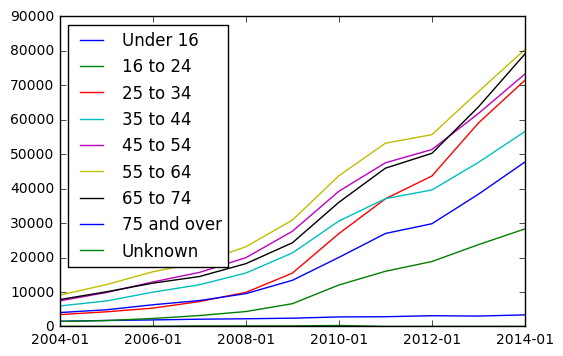

In [21]:
data_without_all.plot()

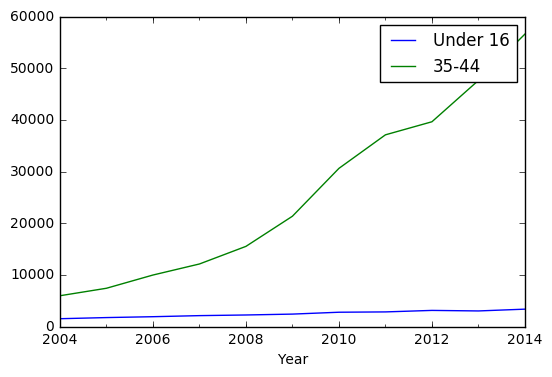

In [10]:
data_without_all['Under 16'].plot(label="Under 16")
data_without_all['35 to 44'].plot(label="35-44")
plt.legend(loc="upper right")

# future

In [80]:
kids_values = data_without_all['Under 16'].values
x_axis = range(len(kids_values))

In [83]:
poly_degree = 3
curve_fit = np.polyfit(x_axis, kids_values, poly_degree)
poly_interp = np.poly1d(curve_fit)

In [84]:
poly_fit_values = []

for i in range(len(x_axis)):
    poly_fit_values.append(poly_interp(i))


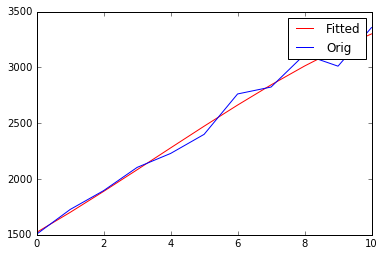

In [85]:
plt.plot(x_axis, poly_fit_values, "-r", label = "Fitted")
plt.plot(x_axis, kids_values, "-b", label = "Orig")

plt.legend(loc="upper right")

In [86]:
x_axis2 = range(15)
poly_fit_values = []
for i in range(len(x_axis2)):
    poly_fit_values.append(poly_interp(i))

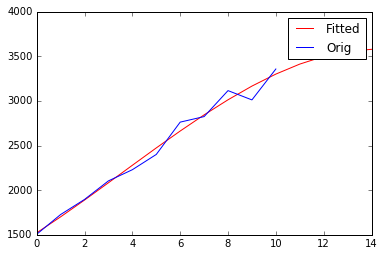

In [88]:
plt.plot(x_axis2, poly_fit_values, "-r", label = "Fitted")
plt.plot(x_axis, kids_values, "-b", label = "Orig")

plt.legend(loc="upper right")